In [10]:
import tensorflow as tf

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib  # 路径管理工具：比os.path更好用

说明：本数据集虽然按图片类型进行了文件夹的分组，并且每个图片也有对应的文件名；但是还是需要人为进行数据集的搭建 + 对应标签的生成（毕竟是两种文件都要有）！

# 一、文件提取：

In [12]:
data_dir = 'E:/tensorflow2.0_日月光华/日月光华-tensorflow资料/数据集/2_class'

In [13]:
# 创建一个路径对象：
data_root = pathlib.Path(data_dir)
data_root 

WindowsPath('E:/tensorflow2.0_日月光华/日月光华-tensorflow资料/数据集/2_class')

In [14]:
# 看看路径对象下，有哪些分类/目录：对目录进行迭代
for item in data_root.iterdir():
    print(item)

E:\tensorflow2.0_日月光华\日月光华-tensorflow资料\数据集\2_class\airplane
E:\tensorflow2.0_日月光华\日月光华-tensorflow资料\数据集\2_class\lake


In [15]:
# 提取所有图片的路径：直接用glob库也可以
all_image_path = list( data_root.glob('*/*') )  # 所有目录里的所有文件；返回的是可迭代对象，直接转为list

print( len(all_image_path) )
all_image_path[0:3]  # 元素是WindowsPath类型/对象

1400


[WindowsPath('E:/tensorflow2.0_日月光华/日月光华-tensorflow资料/数据集/2_class/airplane/airplane_001.jpg'),
 WindowsPath('E:/tensorflow2.0_日月光华/日月光华-tensorflow资料/数据集/2_class/airplane/airplane_002.jpg'),
 WindowsPath('E:/tensorflow2.0_日月光华/日月光华-tensorflow资料/数据集/2_class/airplane/airplane_003.jpg')]

In [16]:
# 把WindowsPath类型，转成真正的路径类型(字符串)：
all_image_path = [ str(path) for path in all_image_path ]

print( type(all_image_path[0]) )
all_image_path[0:3]

<class 'str'>


['E:\\tensorflow2.0_日月光华\\日月光华-tensorflow资料\\数据集\\2_class\\airplane\\airplane_001.jpg',
 'E:\\tensorflow2.0_日月光华\\日月光华-tensorflow资料\\数据集\\2_class\\airplane\\airplane_002.jpg',
 'E:\\tensorflow2.0_日月光华\\日月光华-tensorflow资料\\数据集\\2_class\\airplane\\airplane_003.jpg']

# 二、文件预处理：

### 1. 对文件（路径即可）进行乱序：

In [17]:
# 对文件（路径即可）进行乱序：
import random 

In [18]:
random.shuffle(all_image_path)

In [19]:
# 查看洗牌后结果：
all_image_path[0:3]

['E:\\tensorflow2.0_日月光华\\日月光华-tensorflow资料\\数据集\\2_class\\lake\\lake_695.jpg',
 'E:\\tensorflow2.0_日月光华\\日月光华-tensorflow资料\\数据集\\2_class\\lake\\lake_153.jpg',
 'E:\\tensorflow2.0_日月光华\\日月光华-tensorflow资料\\数据集\\2_class\\airplane\\airplane_076.jpg']

### 2. 记录总图片数：

In [20]:
image_count = len(all_image_path)  # 总图片数

### 3. 提取标签/编码：

In [21]:
# 直接按照“目录”来划分即可：
label_names = sorted( item.name for item in data_root.glob('*') ) # 按首字母进行一个排序
label_names

['airplane', 'lake']

In [22]:
# 把字符串换成数字编码：转为字典
label_to_index = dict( (name, index) for (index,name) in enumerate(label_names) )
label_to_index

{'airplane': 0, 'lake': 1}

### 提示：当前有用的3个变量

In [23]:
# 图片总数：
image_count

# 所有图片的路径：
all_image_path

# 便签对应的编码：
label_to_index

{'airplane': 0, 'lake': 1}

### 4. 给予每张图片对应的标签：

In [24]:
# 提取所有图片的标签：图片文件名的“上一级目录名”，就是对应的标签 —— 利用pathlib.Path
# 例如：
pathlib.Path( 'E:\\tensorflow2.0_日月光华\\日月光华-tensorflow资料\\数据集\\2_class\\airplane\\airplane_363.jpg' ).parent.name

'airplane'

In [25]:
# 提取所有图片的标签：
all_image_label = [ pathlib.Path(p).parent.name for p in all_image_path ]  # 标签字符串的列表
# 转为对应的数字编码：
all_image_label = [ label_to_index.get(label) for label in all_image_label ]
all_image_label[0:3]

[1, 1, 0]

### 5. 再创建一个索引对标签的对象：方便展示

In [28]:
index_to_label = dict( (v,k) for (k,v) in label_to_index.items() )  # 方便最后说明结果
index_to_label

{0: 'airplane', 1: 'lake'}

### 提示：当前有用的5个变量：

In [29]:
# 图片总数：
image_count

# 标签-索引：
label_to_index

# 索引-标签：
index_to_label

# 所有图片的路径：都是字符串！
all_image_path

# 所有图片对应的编码化标签：都已编码为数字！
all_image_label;

# 三、查看文件提取之后的图像：

In [30]:
import IPython.display as display  # 展示图像很方便

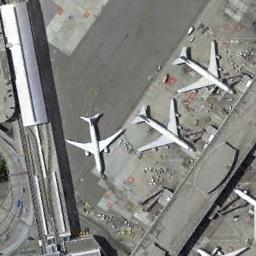

airplane


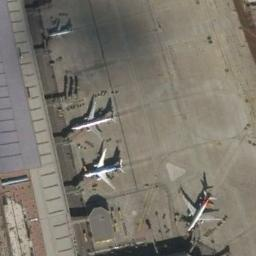

airplane


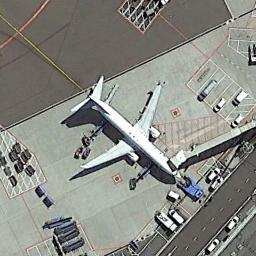

airplane


In [31]:
# 随机读取几张图片看看：
for n in range(3):
    image = random.choice( range(image_count) )  # 每次随机在全部中取一张：1400以内的一个随机数
    display.display( display.Image(all_image_path[image]) )  # 取出那张图
    index = all_image_label[image]
    print( index_to_label.get( index ) )  # 打印它对应的标签

# 四、用tf读取文件、文件预处理：

tf文件读取/解码函数：
- 文件读取：tf.io.read_file( 路径字符串 ) —— 读入后是原始的二进制文件（省空间），不能直接用！
- 文件解码：tf.image.decode_image( 读入的二进制文件 ) —— 解码为对应的张量！

tf转换数据类型函数：
- tf.cast( 原数据, 新数据类型 ) —— 区别：Numpy中是用astype实现的！这里二者不同！
- tensor转numpy数据类型：xtensor.numpy() —— xtensor是一个张量！

In [39]:
# 以一张图片进行例如：
img_path = all_image_path[0]
print( type(img_path) )
img_path

<class 'str'>


'E:\\tensorflow2.0_日月光华\\日月光华-tensorflow资料\\数据集\\2_class\\lake\\lake_695.jpg'

In [40]:
# 文件读入：
img_raw = tf.io.read_file( img_path )  # 文件读入之后，自动转为了二进制形式！

In [41]:
# 文件解码为图像/张量：
img_picture = tf.image.decode_image(img_raw)
img_picture.shape, img_picture.dtype # 每个像素的值都是0-255范围（uint8）！

(TensorShape([256, 256, 3]), tf.uint8)

In [42]:
# 转换数据类型 + 归一化：
img_picture = tf.cast( img_picture, tf.float32 )
img_picture = img_picture / 255

In [43]:
# 查看对应的numpy数据、最值：
print( type(img_picture) )
print( type(img_picture.numpy()) )

print( img_picture.numpy().max() )
print( img_picture.numpy().min() )

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
0.8862745
0.007843138


说明：上面tf对图像的读取与预处理，共做了3步，可以写成下面的函数：
- 1. 文件读入：输入的是路径（字符串）
- 2. 图片解码
- 3. 数值预处理：转数据类型 + 归一化

下面写一个函数，用函数来完成对所有图片完成上面的操作：

In [60]:
def load_preprocess_image(image_path):
    img_raw = tf.io.read_file( image_path )  # 原始二进制文件
    img_picture = tf.image.decode_image(img_raw)  # 解码为图片：通用解码方式，不管图片是什么格式
    img_picture = tf.cast( img_picture, tf.float32 ) # 类型转为float
    img_picture = img_picture / 255  # 归一化
    image = img_picture
    return image  # 返回处理好的图片：已归一化后的张量！

# 改进版函数：特定图片格式解码 + 大小resize
def load_preprocess_image1(image_path):
    img_raw = tf.io.read_file( image_path )  # 原始二进制文件
    img_picture = tf.image.decode_jpeg( img_raw, channels=3 )  # 原图就是jpg，就用特定的解码格式！
    
    # 新加resize：改变图片的size
    img_picture = tf.image.resize( img_picture, [128,128] )  # 这里只需要[高,宽]，不需要通道数！
    
    img_picture = tf.cast( img_picture, tf.float32 ) # 类型转为float
    img_picture = img_picture / 255  # 归一化
    image = img_picture
    return image

TensorShape([128, 128, 3])

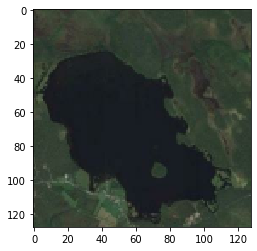

In [61]:
# 测试一下上面的批处理函数：
img_path_test = all_image_path[1399]
# image_test = load_preprocess_image(img_path_test)
# 改用改进函数：
image_test = load_preprocess_image1(img_path_test)
plt.imshow(image_test)
image_test.shape

# 五、用tf.data.Dataset创建数据集：重要！

### 1. 创建数据集： 

In [64]:
# 获取数据集所有文件的路径：可迭代对象！
path_dataset = tf.data.Dataset.from_tensor_slices(all_image_path)
path_dataset

<TensorSliceDataset shapes: (), types: tf.string>

变量名.map(函数名) —— 用括号里函数名，作用于前面的变量名 —— 其实就是简单的函数调用！

In [65]:
# 读入所有路径所对应的所有图像 + 预处理：用前面创建好的批处理函数 —— map方法
image_dataset = path_dataset.map( load_preprocess_image1 )
image_dataset  # 这里shape竟然是unknown，虽然不影响结果，但是不好看！ —— 修改上面的load_preprocess_image函数

# 用新的函数：
# image_dataset = path_dataset.map( load_preprocess_image1 )
# image_dataset  

<MapDataset shapes: (128, 128, 3), types: tf.float32>

In [66]:
# 读入所有图像所对应的标签：可迭代对象！
label_dataset = tf.data.Dataset.from_tensor_slices( all_image_label )
label_dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [67]:
# 查看一下标签与图像是否对应：取前3个标签
for label in label_dataset.take(3):
    print( label.numpy() )  # 把张量转为numpy好看

1
1
0


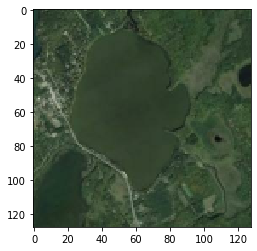

In [68]:
# 查看一下第一张图片：
for picture in image_dataset.take(1):
    plt.imshow(picture)

现在要用到的关键变量：
- image_dataset：所有图片数据集；每张图片元素都已转为张量，已做过归一化！
- label_dataset：标签数据集；每个元素也都是张量！

### 2. 把“图像数据集”与“标签数据集”合并为一个数据集：

In [69]:
# 用元组：
dataset = tf.data.Dataset.zip( (image_dataset, label_dataset) )
dataset

<ZipDataset shapes: ((128, 128, 3), ()), types: (tf.float32, tf.int32)>

### 提示：现在有用的4个变量

In [70]:
# 图片总数：√
image_count

# 图片数据集：√
image_dataset

# 标签数据集：√
label_dataset

# 总合并数据集：√ —— 后面都只用这个！
dataset;

### 3. 划分测试集、训练集： 

In [71]:
# 2:8
test_count = int( image_count*0.2 )
train_count = image_count - test_count

In [72]:
train_count, test_count

(1120, 280)

In [75]:
# skip函数是略过多少，take函数是取多少：
train_dataset = dataset.skip( test_count )  # 略过280个，剩下全要
test_dataset = dataset.take( test_count )   # 取280个，剩下全不要

### 4. 设置batch：

In [76]:
# 每个epoch下再分32个批次：训练集、测试集的batch都是32。
BATCH_SIZE = 32 

In [78]:
# 乱序：训练数据！
train_dataset = train_dataset.shuffle( buffer_size=train_count ).repeat().batch( BATCH_SIZE ) # 训练数据是乱序的，每次给一个batch的数据
# 测试集：只用设计batch大小即可，无需随机！
test_dataset = test_dataset.batch( BATCH_SIZE )

### 5. 设置一个epoch里有多少batch：

In [79]:
# 训练集：每个epoch里有多少个batch
steps_per_epoch = train_count // BATCH_SIZE   # 每个epoch有35批
# 测试集：
validation_steps = test_count // BATCH_SIZE   # 每个epoch有8批

In [80]:
steps_per_epoch, validation_steps  

(35, 8)

至此，所有的数据预处理完毕！下面可以开始网络训练。

这里总结一下tf.data.Dataset模块干了什么和对应的函数：
- 数据读取（图像+标签）：tf.data.Dataset.from_tensor_slices( 路径文件 )
- 标签数据集、图像数据集合并：tf.data.Dataset.zip()

# 六、网络搭建：

In [85]:
model = tf.keras.Sequential()   #顺序模型
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())  # 最后一个全局均值池化

model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))  # 2分类

# 注：这里运行之后容易报错，注意很可能是网络太深了，导致后面图片不断减少后小于卷积核的大小！

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 58, 58, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 27, 27, 256)      

In [87]:
# 模型编译：
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['acc']
)

In [ ]:
history = model.fit( train_dataset, 
                     epochs = 30, 
                     steps_per_epoch = steps_per_epoch,   # 训练数据：
                     validation_data = test_dataset, 
                     validation_steps = validation_steps  # 测试数据：
)

Train for 35 steps, validate for 8 steps
Epoch 1/30
